## Regularization
It is a technique using which you induce some edit information in a machine learning model so that you can reduce overfitting.

## Ridge Regression
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

**[Sum of(Yi - Yi_pred)^2 + (lambda(m)^2)]**

<img title="Ridge Regression" src='ridge Regression.png' height=500 width=500 />

## Bias
* The bias is known as the difference between the prediction of the values by the ML model and the correct value. Being high in biasing gives a large error in training as well as testing data. Its recommended that an algorithm should always be low biased to avoid the problem of underfitting.
* The inability of a Machine Learning model to truely capture the relationship in the Training data.It's means that when our model would not perform well on the training data and can't find the hiddent patterns in the train data so it is called as Bias.
* High bias means it did not captures the training data well low bias means it captures the training data well.
* Generally high bias happens when tha training model is underfitted.


## Variance
* Variance describes how much a model changes when you train it using different portions of your data set. A model with high variance will have the flexibility to match any data set that's provided to it, potentially resulting in dramatically different models each time.
* It is basically an assumption. It learn the Training path of the data proparly but when we give the test data so it not give much accurate resluts so the difference of training accuracy to test accuracy is the variance. Variance is basically Difference of fits on different datasets
* when we train the model on a dataset but when we provide another dataset for test so it's performance and accuracy is different. So the difference is called the variance.
* When the difference is less among train and test so the variance is low rather than difference is high then variance becomes high.
* Generally it happens when the training model is overfitted.

***Always try to find the Low Variance and Low Bias***

### There are three methods to handling the Bias and Variance.
* Regularization
* Bagging
* Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print(lr.coef_)
print(lr.intercept_)

[  23.45388514 -247.43107084  492.10188174  329.36498638 -970.79784704
  573.54460121  182.41386124  255.9162021   794.21654496   89.32074078]
152.13619339070766


In [10]:
y_pred=lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score is: ",r2_score(y_test,y_pred))
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score is:  0.5188118914964637
RMSE is:  48.72710829141399


In [12]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)  # alpha is lambda value in the equation

In [13]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [14]:
print(R.coef_)
print(R.intercept_)

[  23.51686911 -247.32125446  492.275602    329.33800911 -957.4635746
  562.90448286  176.70286753  254.46487953  789.10899582   89.41201826]
152.13488083249402


In [15]:
y_pred1=R.predict(X_test)

In [16]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5189738344370788
RMSE 48.71890809371286


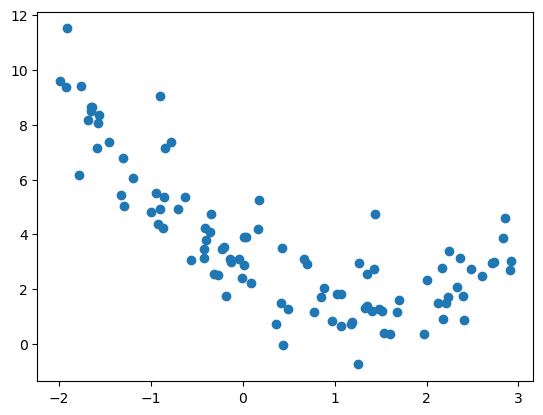

In [17]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

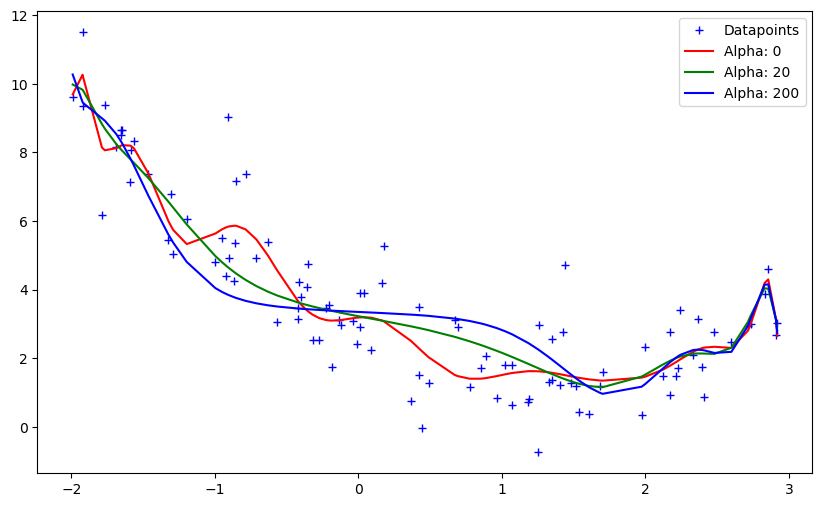

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [19]:
first = [1,2,3,4,5]
second = first
second.append(6)
print(first)
print(second)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6]
